In [1]:
%matplotlib inline

import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing

# load feature variables and their names
X = np.loadtxt('hitters.x.csv', delimiter = ',', skiprows = 1)
with open('hitters.x.csv','r') as f:
        X_colnames = next(csv.reader(f))
print(X)
        
# load salaries
y = np.loadtxt('hitters.y.csv',delimiter = ',', skiprows = 1)

[[315.  81.   7. ...  43.  10.   1.]
 [479. 130.  18. ...  82.  14.   0.]
 [496. 141.  20. ...  11.   3.   1.]
 ...
 [475. 126.   3. ... 113.   7.   0.]
 [573. 144.   9. ... 131.  12.   0.]
 [631. 170.   9. ...   4.   3.   0.]]


1. Scaling the feature variables to a standard deviation of 1 is appropriate in this application, since we are trying to predict  salaries of baseball players and the given data may include some instances of too high or too low salaries.

In [2]:
scale = preprocessing.StandardScaler().fit(X)
X_scaled = scale.transform(X)
print(X_scaled)

[[-0.6029005  -0.59567545 -0.5285512  ... -0.52319133  0.21335208
   1.07505242]
 [ 0.51254171  0.49225957  0.72996619 ... -0.25386267  0.81996395
  -0.9301872 ]
 [ 0.62816682  0.73648988  0.95878753 ... -0.74417894 -0.84821868
   1.07505242]
 ...
 [ 0.48533581  0.40344855 -0.98619389 ... -0.03978092 -0.24160682
  -0.9301872 ]
 [ 1.15188054  0.80309815 -0.29972986 ...  0.08452461  0.51665801
  -0.9301872 ]
 [ 1.54636621  1.38036979 -0.29972986 ... -0.79251998 -0.84821868
  -0.9301872 ]]


2. Augmented data matrix $\tilde{X} = [1 \space X]$
$\newline$  Let $\space\tilde{\theta}^T = [1 \space {\theta}]^T$

Ridge regression not including the bias weight in the ${l}_2$ norm penalty:
$\newline \hat{\theta}_{ridge} = argmin\space|| y - \tilde{X}\tilde{\theta}||_2^2 + {\lambda}||{\theta}||_2^2$
See notes in PDF above.

In [3]:
n,d = X_scaled.shape
print(n,d)
one = np.ones((n,1))
X_tilde = np.hstack((one,X_scaled))
print(X_tilde)

lambdas = np.logspace(-3, 7, 100)
I = np.identity(d+1)
I[0] = 0

263 19
[[ 1.         -0.6029005  -0.59567545 ... -0.52319133  0.21335208
   1.07505242]
 [ 1.          0.51254171  0.49225957 ... -0.25386267  0.81996395
  -0.9301872 ]
 [ 1.          0.62816682  0.73648988 ... -0.74417894 -0.84821868
   1.07505242]
 ...
 [ 1.          0.48533581  0.40344855 ... -0.03978092 -0.24160682
  -0.9301872 ]
 [ 1.          1.15188054  0.80309815 ...  0.08452461  0.51665801
  -0.9301872 ]
 [ 1.          1.54636621  1.38036979 ... -0.79251998 -0.84821868
  -0.9301872 ]]


In [4]:
def compute_thetatilde(X,y,lmbda):
    G_inv = np.linalg.inv(np.dot(np.transpose(X),X)+np.dot(lmbda,I))
    theta_tilde = np.dot(G_inv,np.dot(np.transpose(X),y))
    return theta_tilde

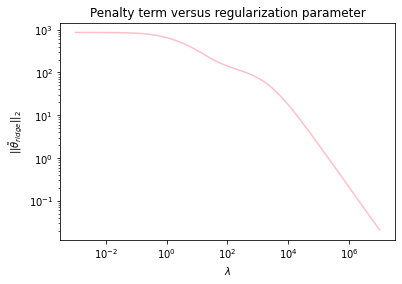

In [5]:
thetatilde = np.array([compute_thetatilde(X_tilde,y,lam) for lam in lambdas])
norm_theta = np.sqrt((thetatilde[:, 1:]**2).sum(1))

plt.loglog(lambdas,norm_theta, 'pink')
plt.ylabel(r'$||\tilde{\theta}_{ridge}||_2$')
plt.xlabel(r'${\lambda}$')
plt.title('Penalty term versus regularization parameter')
plt.show()

Comparing with the least squares estimate for a very small value of ${\lambda}$ and verifying the components for a very large value of ${\lambda}$:

In [6]:
T_inv =  np.linalg.inv(np.dot(np.transpose(X_scaled),X_scaled))
theta_leastsquares = np.dot(T_inv,np.dot(np.transpose(X_scaled),y))
theta_l0 = compute_thetatilde(X_tilde,y,lambdas[0])
np.delete(theta_l0,0)

print('\nLeast squares estimate:',theta_leastsquares)
print('Ridge regression estimate:', theta_l0[1:])
print('\nDifference:', theta_leastsquares-theta_l0[1:])
print('\n')
print('Frobenius norm of the difference of the two estimates:', np.linalg.norm(theta_leastsquares-theta_l0[1:]))

print('\nRidge regression estimate for a large value of lambda\
 (except the intercept/first value):\n', compute_thetatilde(X_tilde,y,lambdas[98])[1:])


Least squares estimate: [-291.09462584  337.83057573   37.85384355  -60.57253276  -26.99496538
  135.07394623  -16.69329665 -391.03867469   86.68713265  -14.18188514
  480.74772158  260.69007975 -213.8924465    31.24874897  -58.41399362
   78.76122932   53.73244107  -22.16080176  -12.34882979]
Ridge regression estimate: [-291.07689885  337.76983981   37.817637    -60.51643708  -26.96167438
  135.05922913  -16.72927386 -390.81338172   86.882135    -14.05166346
  480.42919877  260.45660149 -213.84040958   31.24937094  -58.4169906
   78.76124192   53.72488332  -22.16403075  -12.35251465]

Difference: [-1.77269975e-02  6.07359232e-02  3.62065513e-02 -5.60956785e-02
 -3.32910000e-02  1.47171011e-02  3.59772122e-02 -2.25292967e-01
 -1.95002344e-01 -1.30221672e-01  3.18522812e-01  2.33478259e-01
 -5.20369133e-02 -6.21975493e-04  2.99697362e-03 -1.26048120e-05
  7.55775105e-03  3.22899183e-03  3.68485864e-03]


Frobenius norm of the difference of the two estimates: 0.5249644874821094

Ridge r